## Mounting Drive

In [181]:
# from google.colab import drive
# import os

# drive.mount("/content/drive")
# os.chdir(os.path.join("/content", "drive", "MyDrive", "ML Virtual Internship"))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Reading Data

In [182]:
import pandas as pd

df = pd.read_csv("./data/pred-maint-classification.csv")

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,1000.0,500.500000,288.819436,1.000000,250.750000,500.500000,750.250000,1000.000000
rpm,1000.0,1499.516000,707.681915,480.000000,988.750000,1500.000000,2010.000000,2520.000000
motor_power,1000.0,6984.877371,4269.277571,1402.424603,3559.437042,5906.662534,9636.002782,19454.559080
torque,1000.0,49.186120,18.706750,13.222197,33.749857,48.890905,63.672921,93.540405
outlet_pressure_bar,1000.0,4.054049,1.862761,1.000000,2.443750,4.038000,5.600250,8.664000
air_flow,1000.0,754.673930,442.743491,95.098952,305.388152,608.626411,1193.266273,1539.911634
noise_db,1000.0,53.412121,8.055363,39.879017,46.490976,52.708480,60.158248,74.401986
outlet_temp,1000.0,118.855110,19.120181,76.902822,104.731080,118.275842,132.850790,172.711382
wpump_outlet_press,1000.0,2.799610,0.455274,1.834533,2.448208,2.780492,3.092101,4.295136
water_inlet_temp,1000.0,83.021711,18.644992,43.166392,68.914714,82.101660,95.792346,137.543531


## Filtering

In [183]:
print(df.sample(10))

print(df.info())

# dropping classification label columns
df = df.drop(["id", "wpump", "radiator", "exvalve", "acmotor"], axis=1)

      id   rpm   motor_power     torque  outlet_pressure_bar     air_flow  \
871  872  2485  14607.708920  57.733278                5.515  1487.601565   
462  463  1487   6818.642753  45.021773                3.977   906.486365   
739  740  1999   8628.729250  41.879251                3.864  1040.079407   
330  331  1012   3529.538303  34.102764                2.596   522.030842   
732  733  1986   6974.273993  38.086329                3.055  1051.151371   
652  653  1998   7090.609607  35.875901                3.097  1214.484438   
433  434  1484   9745.396594  66.703357                5.957   897.020601   
921  922  2486   3701.358487  14.282711                1.125  1340.104910   
536  537  1487   5906.243033  38.844352                3.364   772.331393   
927  928  2508   6515.040467  25.436571                2.238  1327.644427   

      noise_db  outlet_temp  wpump_outlet_press  water_inlet_temp  ...  \
871  74.295515   142.036180            3.605573        101.505769  ...   
462 

## Correlation

In [184]:
df.corr()["bearings"].abs().sort_values(ascending=False)

bearings               1.000000
water_flow             0.360265
noise_db               0.349152
air_flow               0.169417
outlet_temp            0.145536
water_outlet_temp      0.141253
water_inlet_temp       0.138962
oil_tank_temp          0.137766
wpump_power            0.101119
wpump_outlet_press     0.088477
gaccz                  0.045373
haccz                  0.045117
outlet_pressure_bar    0.028056
torque                 0.027546
oilpump_power          0.019425
haccy                  0.019404
motor_power            0.012271
gaccy                  0.001068
gaccx                  0.001029
haccx                  0.000724
rpm                    0.000112
Name: bearings, dtype: float64

## EDA

0    800
1    200
Name: bearings, dtype: int64


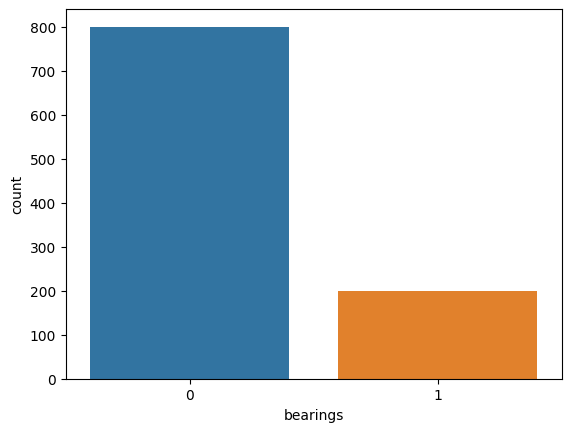

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df["bearings"])

print(df["bearings"].value_counts())  # todo: upsample 1 class

## Up sample

<Axes: xlabel='bearings', ylabel='count'>

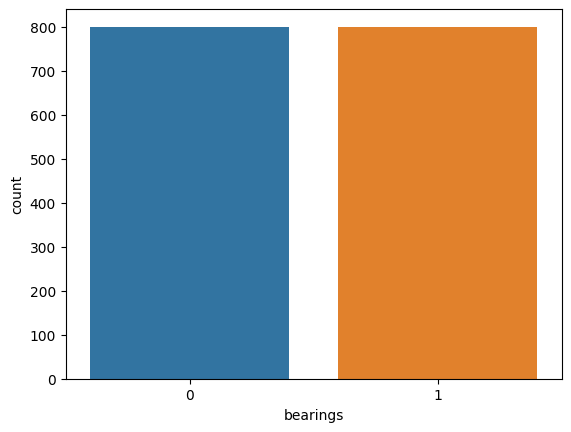

In [186]:
from sklearn.utils import resample

df_pos = df[df["bearings"] == 1]
df_neg = df[df["bearings"] == 0]

df_pos_upsampled = resample(df_pos, n_samples=800, random_state=123)

df = pd.concat([df_pos_upsampled, df_neg])

sns.countplot(x=df["bearings"])

## Train Test Split

In [187]:
from sklearn.model_selection import train_test_split

X, y = df.loc[:, :"haccz"].to_numpy(), df.loc[:, "bearings"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

print(X_train.shape, type(X_train), y_train.shape, type(y_train))
print(X_test.shape, type(X_test), y_test.shape, type(y_test))

(1280, 20) <class 'numpy.ndarray'> (1280,) <class 'numpy.ndarray'>
(320, 20) <class 'numpy.ndarray'> (320,) <class 'numpy.ndarray'>


## Training Classifier

In [188]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np

classifiers = [
    KNeighborsClassifier(3, probability=True),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(),
    RandomForestClassifier(random_state=123),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

In [189]:
performance = {}
models = {}
for i, classifier in enumerate(classifiers):
    clf = Pipeline([
        ("normalize", StandardScaler()), 
        ("model", classifier)
    ])
    clf.fit(X_train, y_train)
    models[classifier.__class__.__name__] = clf
    performance[classifier.__class__.__name__] = clf.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'KNeighborsClassifier': 0.865625, 'SVC': 0.965625, 'GaussianProcessClassifier': 0.996875, 'DecisionTreeClassifier': 0.9875, 'RandomForestClassifier': 1.0, 'MLPClassifier': 0.996875, 'AdaBoostClassifier': 0.996875, 'GaussianNB': 0.759375, 'QuadraticDiscriminantAnalysis': 0.96875}


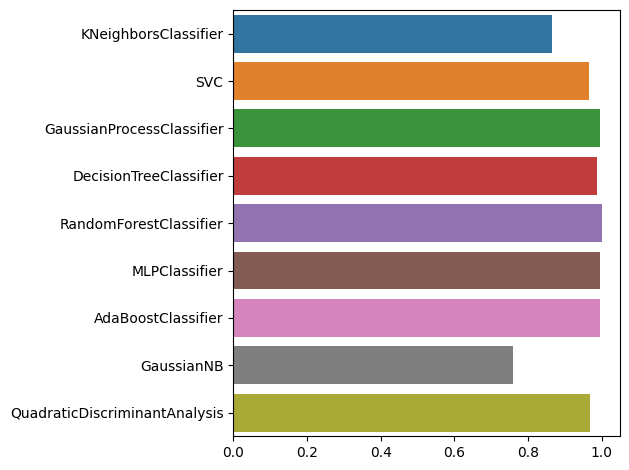

In [190]:
print(performance)
keys = list(performance.keys())
vals = list(performance.values())

ax = sns.barplot(y=keys, x=vals)
plt.tight_layout()

## Test

In [195]:
mlp = models["MLPClassifier"]
print(mlp)

sample_data_point = np.array(list({
    "rpm": 1499.52,
    "motor_power": 6984.88,
    "torque": 49.186,
    "outlet_pressure_bar": 4.06,
    "air_flow": 754.67,
    "noise_db": 53.41,
    "outlet_temp": 118.86,
    "wpump_outlet_press": 2.80,
    "water_inlet_temp": 83.02,
    "water_outlet_temp": 96.64,
    "wpump_power": 222.19,
    "water_flow": 53.71,
    "oilpump_power": 300.48,
    "oil_tank_temp": 46.24,
    "gaccx": 0.60,
    "gaccy": 0.35,
    "gaccz": 3.92,
    "haccx": 1.10,
    "haccy": 1.35,
    "haccz": 3.50,
}.values()))

pos_samples = X_test[y_test == 1][0:3]
neg_samples = X_test[y_test == 0][0:3]

samples = []
samples.append(sample_data_point)
samples.extend(pos_samples)
samples.extend(neg_samples)

for class_name, pipeline in models.items():
    print(class_name, ":", pipeline.predict(samples))
    try:
        print(pipeline.predict_proba(samples))
    except Exception as e:
        pass
    print()

Pipeline(steps=[('normalize', StandardScaler()),
                ('model', MLPClassifier(alpha=1))])
KNeighborsClassifier : [0 1 1 1 0 0 0]
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]

SVC : [0 1 1 1 0 0 0]

GaussianProcessClassifier : [0 1 1 1 0 0 0]
[[0.92809907 0.07190093]
 [0.00634563 0.99365437]
 [0.0758615  0.9241385 ]
 [0.00926636 0.99073364]
 [0.98855868 0.01144132]
 [0.87576234 0.12423766]
 [0.80364024 0.19635976]]

DecisionTreeClassifier : [0 1 1 1 0 0 0]
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]

RandomForestClassifier : [0 1 1 1 0 0 0]
[[0.98 0.02]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.89 0.11]
 [1.   0.  ]
 [0.92 0.08]]

MLPClassifier : [0 1 1 1 0 0 0]
[[9.84722581e-01 1.52774193e-02]
 [9.85051663e-04 9.99014948e-01]
 [2.34567540e-02 9.76543246e-01]
 [4.43788799e-03 9.95562112e-01]
 [9.98117399e-01 1.88260129e-03]
 [9.99682693e-01 3.17307324e-04]
 [9.91687118e-01 8.31288178e-03]]

AdaBoostClassifier : [0 1 1 1 0 0 0]
[[0.66065

## Confusion Matrix

KNeighborsClassifier


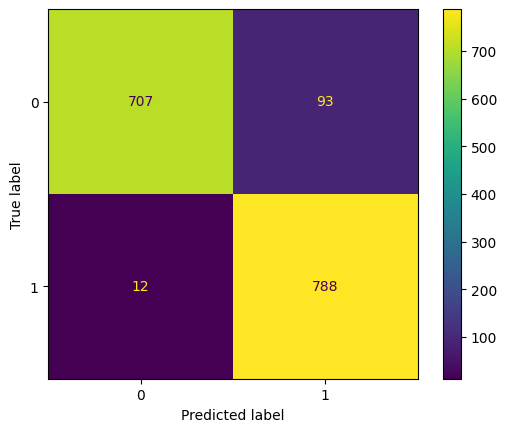

SVC


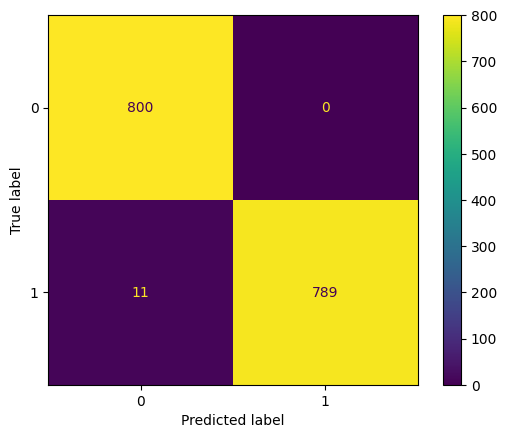

GaussianProcessClassifier


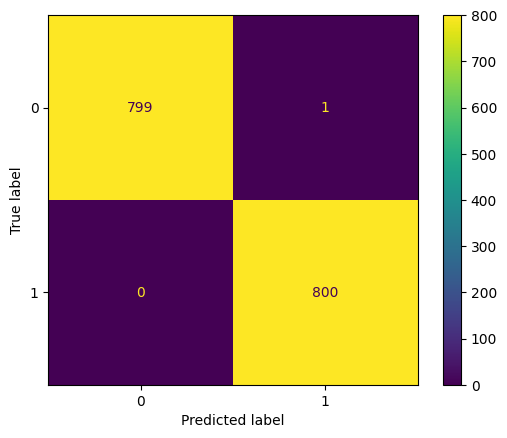

DecisionTreeClassifier


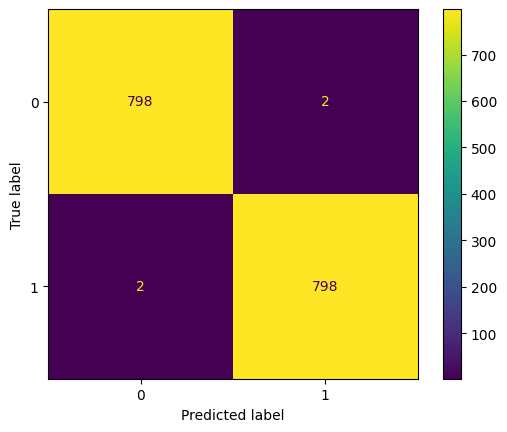

RandomForestClassifier


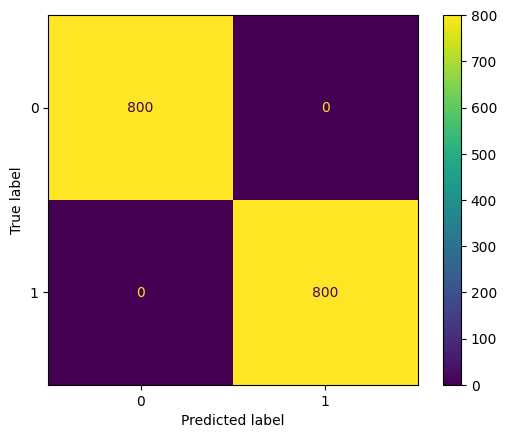

MLPClassifier


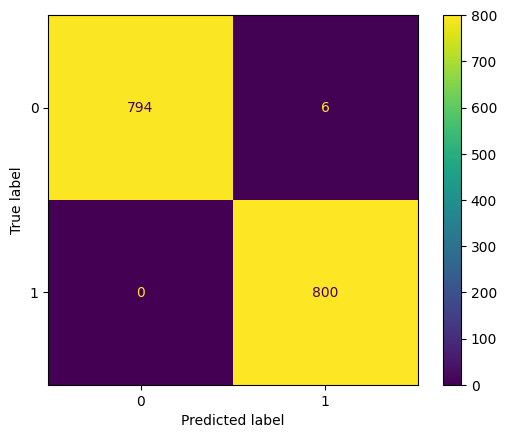

AdaBoostClassifier


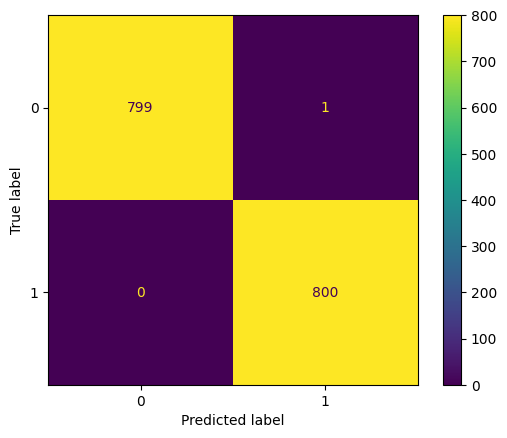

GaussianNB


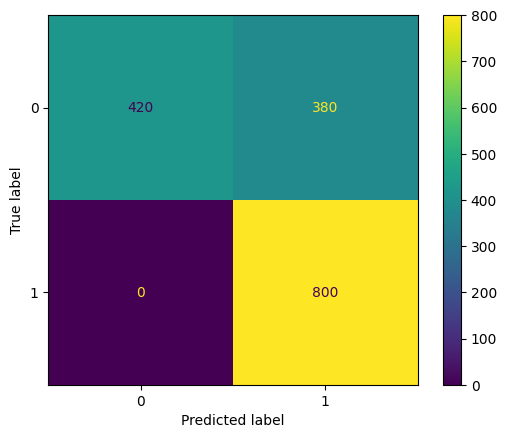

QuadraticDiscriminantAnalysis


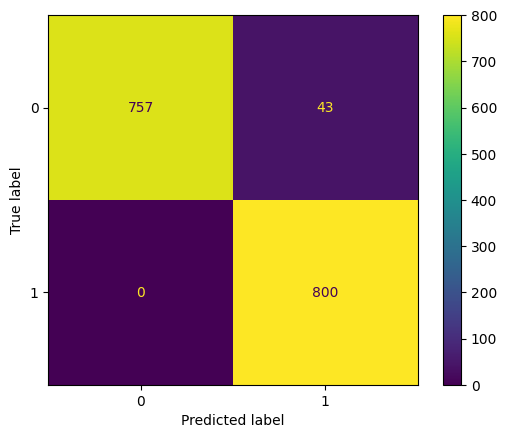

In [196]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for class_name, pipeline in models.items(): 
    print(class_name)
    y_pred = pipeline.predict(X)
    cm = confusion_matrix(y, y_pred, labels=pipeline.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
    disp.plot()
    plt.show()